In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
# Load the data
crime_data = pd.read_csv('NCRB_Table_1C.2 (1).csv')

# Remove the last two rows which contain total values
crime_data = crime_data.iloc[:-2]

# Convert the 'State/UT' column to string
crime_data['State/UT'] = crime_data['State/UT'].astype(str)

In [4]:
crime_data.head(10)

,Sl. No.,Category,State/UT,Murder (Sec.302 IPC),Culpable Homicide not amounting to Murder (Sec.304 IPC),Infanticide (Sec.315 IPC),Foeticide (Sec.316 IPC),Dowry Deaths (Sec.304B IPC),Attempt to Commit Murder (Sec.307 IPC),Attempt to Commit Culpable Homicide (Sec.308 IPC),...,Kidnapping and Abduction (Sec 363-369 IPC),Rape (Sec.376 IPC),Attempt to Commit Rape (Sec.376 r/w 511 IPC),Rioting (Sec 147-151 & 153A IPC),Robbery (Sec 392 to 394 IPC),Dacoity (Sec 395 to 398 IPC),Arson (Sec 435 to 438 IPC),Total Violent Crimes (Cols.3 to 17),Unnamed: 19,Unnamed: 20
0,1,States,Andhra Pradesh,925.0,128.0,0.0,3.0,100.0,1615.0,1.0,...,903.0,621.0,180.0,304.0,294.0,49.0,530.0,7104.0,NaN,NaN
1,2,States,Arunachal Pradesh,56.0,2.0,0.0,0.0,0.0,26.0,0.0,...,70.0,74.0,3.0,11.0,52.0,1.0,18.0,440.0,NaN,NaN
2,3,States,Assam,1072.0,58.0,0.0,0.0,175.0,750.0,3.0,...,4560.0,1113.0,253.0,230.0,705.0,81.0,275.0,14314.0,NaN,NaN
3,4,States,Bihar,2930.0,111.0,0.0,0.0,1057.0,8667.0,558.0,...,11822.0,881.0,17.0,4736.0,2282.0,260.0,181.0,49610.0,NaN,NaN
4,5,States,Chhattisgarh,1013.0,50.0,6.0,16.0,57.0,753.0,5.0,...,2740.0,1246.0,8.0,961.0,495.0,67.0,343.0,8848.0,NaN,NaN
5,6,States,Goa,44.0,4.0,0.0,0.0,0.0,19.0,1.0,...,84.0,73.0,0.0,53.0,14.0,4.0,15.0,396.0,NaN,NaN
6,7,States,Gujarat,959.0,125.0,6.0,18.0,10.0,946.0,61.0,...,1846.0,610.0,2.0,172.0,575.0,116.0,204.0,9015.0,NaN,NaN
7,8,States,Haryana,1020.0,78.0,5.0,11.0,234.0,976.0,160.0,...,3891.0,1787.0,255.0,2373.0,617.0,118.0,295.0,13447.0,NaN,NaN
8,9,States,Himachal Pradesh,85.0,11.0,0.0,0.0,1.0,74.0,0.0,...,413.0,359.0,9.0,345.0,8.0,1.0,74.0,1858.0,NaN,NaN
9,10,States,Jharkhand,1550.0,57.0,4.0,7.0,208.0,2862.0,1.0,...,1899.0,1298.0,88.0,1793.0,702.0,116.0,86.0,13323.0,NaN,NaN


# Question 1: Crime Rate by State/Region
### Which state or union territory has the highest or lowest rates of violent crimes?

In [5]:
violent_crime_rates = pd.to_numeric(crime_data['Total Violent Crimes (Cols.3 to 17)'], errors='coerce')
violent_crime_rates = violent_crime_rates.fillna(0).astype(int)
max_violent_crime_rate = violent_crime_rates.max()
min_violent_crime_rate = violent_crime_rates.min()

max_violent_crime_state = crime_data.loc[violent_crime_rates.idxmax()]['State/UT']
min_violent_crime_state = crime_data.loc[violent_crime_rates.idxmin()]['State/UT']

print(f'The state with the highest violent crime rate is {max_violent_crime_state} with {max_violent_crime_rate} crimes.')
print(f'The state with the lowest violent crime rate is {min_violent_crime_state} with {int(min_violent_crime_rate)} crimes.')

The state with the highest violent crime rate is Total State (S) with 419090 crimes.
The state with the lowest violent crime rate is nan with 0 crimes.


# Question 2: Violent Crime Trend Analysis
### What are the most common violent crimes in India, and how do they differ across regions?

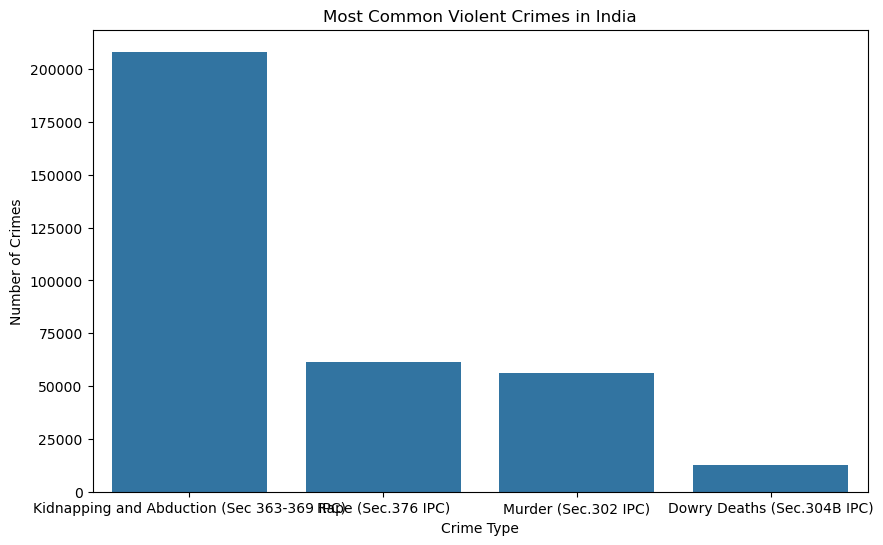

In [6]:
crime_types = ['Murder (Sec.302 IPC)', 'Rape (Sec.376 IPC)', 'Dowry Deaths (Sec.304B IPC)', 'Kidnapping and Abduction (Sec 363-369 IPC)']
crime_rates = crime_data[crime_types].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=crime_rates.index, y=crime_rates.values)
plt.title('Most Common Violent Crimes in India')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

# Question 3: Correlation Analysis of Crimes
### Are there any correlations between different types of violent crimes?

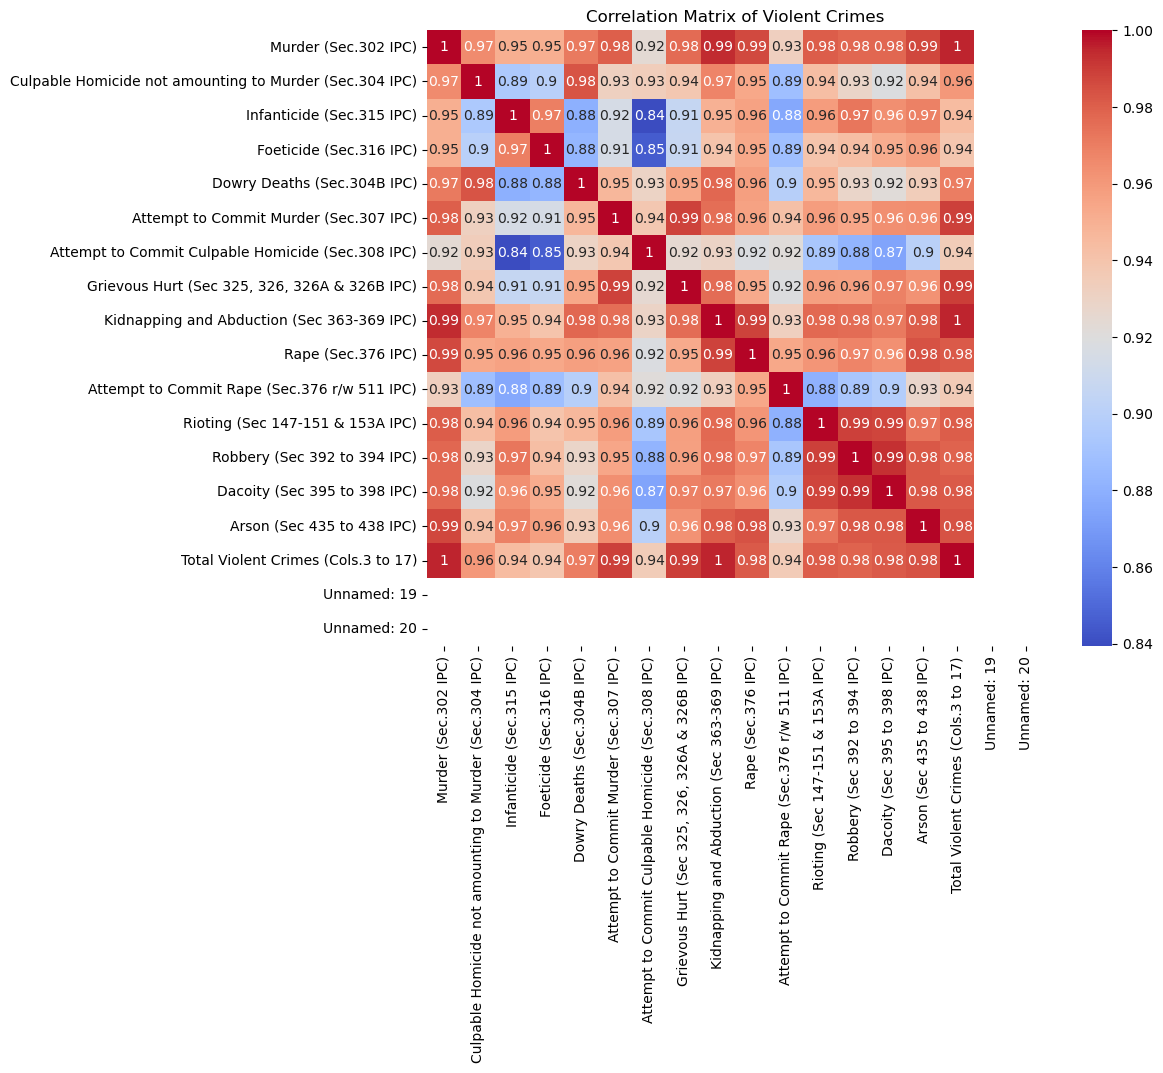

In [7]:
crime_data_numeric = crime_data.select_dtypes(include=[np.number])
corr_matrix = crime_data_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Violent Crimes')
plt.show()

# Question 4: Impact of Gender-Related Crimes
### Which states have the highest rates of gender-based crimes like rape, dowry deaths, and infanticide?

In [8]:
import pandas as pd

# Replace "crime_data.csv" with your actual file name
crime_data = pd.read_csv("NCRB_Table_1C.2 (1).csv")

gender_crimes = ['Rape (Sec.376 IPC)', 'Dowry Deaths (Sec.304B IPC)', 'Infanticide (Sec.315 IPC)']
gender_crime_rates = crime_data[gender_crimes].sum(axis=1).sort_values(ascending=False)

# Get the top 5 states with the highest rates
top_5_states = gender_crime_rates.head(5)

# Print the top 5 states and their crime rates
print("The top 5 states with the highest rates of gender-based crimes are:")
for state, crime_rate in top_5_states.items():
    print(f"{state}: {crime_rate}")

The top 5 states with the highest rates of gender-based crimes are:
41: 38049.0
29: 36287.0
20: 5857.0
25: 5828.0
12: 3558.0


# Question 5: Crime Prevention Prioritization
### Based on crime frequency, which states should prioritize tackling specific crimes?

In [9]:
crime_frequencies = crime_data['Total Violent Crimes (Cols.3 to 17)'].value_counts().sort_values(ascending=False)

print('The top 5 states with the highest crime frequencies are:')
print(crime_frequencies.head(5))

The top 5 states with the highest crime frequencies are:
Total Violent Crimes (Cols.3 to 17)
7104.0     1
17091.0    1
14314.0    1
49610.0    1
8848.0     1
Name: count, dtype: int64


# Question 6: Crime Severity and Category Analysis
### Which category of crimes contributes the most to total violent crime rates across different regions?

In [10]:
crime_categories = ['Murder (Sec.302 IPC)', 'Rape (Sec.376 IPC)', 'Dowry Deaths (Sec.304B IPC)', 'Kidnapping and Abduction (Sec 363-369 IPC)']
crime_category_rates = crime_data[crime_categories].sum().sort_values(ascending=False)

print('The top 5 crime categories that contribute the most to total violent crime rates are:')
print(crime_category_rates.head(5))

The top 5 crime categories that contribute the most to total violent crime rates are:
Kidnapping and Abduction (Sec 363-369 IPC)    322764.0
Rape (Sec.376 IPC)                             94548.0
Murder (Sec.302 IPC)                           85566.0
Dowry Deaths (Sec.304B IPC)                    19350.0
dtype: float64


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Get GeoDataFrame of Indian states
states = gpd.read_file('Indian_States.shp')

# 2. Merge crime data with GeoDataFrame (consider handling missing data)
try:
  states = states.merge(crime_data, on='State/UT', how='left')
except KeyError:
  print("Error: 'state_name' column not found in crime_data. Make sure it matches the shapefile.")
  exit()

# Optionally filter states with missing data (if needed)
# states = states.dropna(subset=['crime_rate'])  # This removes rows with missing crime_rate

# 3. Plot the map with color based on crime rate
fig, ax = plt.subplots(1, 1)
states.plot(column='crime_rate', cmap='Reds', legend=True, ax=ax)
ax.set_title('Crime Intensity in India')

plt.show()

NameError: name 'crime_data' is not defined